# Week 08 Homework
### 8.1

Last week you practiced single band raster calculations using Sentinel-2 satellite remote sensing data. This week you will practice working with the multiple bands associated with Sentinel-2 data in order to create RGB composites and other band manipulations. 

The Sentinel-2 bands are as follows:

![_._](img/sentinel-2-bands.jpg)

You will compare RGB and NDVI images from May 2018 (```data/pre-woolsey-fire/```) and February 2019 (```data/post-woolsey-fire```) over the Santa Monica Mountains which correspond to pre and post-Woolsey fire. The Woolsey fire occured in November 2018. 

1. Create an **automated workflow** which loads, stacks and cleans the bands of a single Sentinel-2 date. 
2. Run this workflow for both dates: pre and post Woolsey fire.
3. Map the RGB composites for both dates.
4. Calculate the NDVI and map both dates.
5. Write a few sentences of what differences you see between the RGB/NDVI maps. 




In [2]:
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray as rxr

# 1. Create an automated workflow which loads, stacks and cleans the bands of a single Sentinel-2 date.
# 2. Run this workflow for both dates: pre and post Woolsey fire.

# Create path for data
predata_path = os.path.join("data", "pre-woolsey-fire")
postdata_path = os.path.join("data", "post-woolsey-fire")

# Generate list of tif files
predata = glob(os.path.join(predata_path, "*Raw*.tiff"))
postdata = glob(os.path.join(postdata_path, "*Raw*.tiff"))

#Sort data so bands are in correct order
predata.sort()
postdata.sort()


In [17]:
# Squeeze bands
preband_red = rxr.open_rasterio(predata[0], masked=True).squeeze()
preband_infared = rxr.open_rasterio(predata[7], masked=True).squeeze()

postband_red = rxr.open_rasterio(postdata[0], masked=True).squeeze()
postband_infared = rxr.open_rasterio(postdata[7], masked=True).squeeze()

In [6]:
# Clean bands
def open_clean_bands(predata):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An single xarray object with the Landsat band data.

    """
     
    return rxr.open_rasterio(predata, masked=True).squeeze()


def open_clean_bands(postdata):
    return rxr.open_rasterio(postdata, masked=True).squeeze()

In [8]:
# Open all bands in a loop
pre_all_bands = []
for i, aband in enumerate(predata):
    pre_all_bands.append(open_clean_bands(aband))
    # Assign a band number to the new xarray object
    # names bands
    pre_all_bands[i]["band"]=i+1
    
post_all_bands = []
for i, aband in enumerate(postdata):
    post_all_bands.append(open_clean_bands(aband))
    post_all_bands[i]["band"]=i+1

In [9]:
# OPTIONAL - Stack the data
predata_stack = xr.concat(pre_all_bands, dim="band")
predata_stack

postdata_stack = xr.concat(post_all_bands, dim="band")
postdata_stack

<xarray.DataArray (band: 12, y: 337, x: 625)>
array([[[ 0.,  2.,  8., ..., 37., 30., 34.],
        [ 3.,  8.,  7., ..., 46., 26., 31.],
        [10.,  8.,  8., ..., 44., 22., 19.],
        ...,
        [ 0.,  0.,  0., ..., 13., 15., 21.],
        [ 0.,  0.,  0., ..., 15., 17., 18.],
        [ 0.,  0.,  0., ..., 16., 15., 17.]],

       [[ 4.,  6., 15., ..., 43., 37., 41.],
        [ 6., 14., 14., ..., 61., 33., 44.],
        [18., 14., 13., ..., 54., 28., 26.],
        ...,
        [ 1.,  1.,  1., ..., 18., 20., 31.],
        [ 1.,  1.,  1., ..., 18., 20., 25.],
        [ 1.,  1.,  1., ..., 22., 17., 23.]],

       [[10., 12., 23., ..., 46., 41., 46.],
        [12., 22., 22., ..., 67., 36., 45.],
        [27., 22., 22., ..., 59., 32., 30.],
        ...,
...
        ...,
        [ 0.,  0.,  0., ..., 36., 40., 43.],
        [ 0.,  0.,  0., ..., 37., 40., 47.],
        [ 0.,  0.,  0., ..., 42., 35., 36.]],

       [[29., 35., 65., ..., 48., 48., 49.],
        [37., 65., 63., ..., 53., 38., 35.],
        [73., 64., 62., ..., 51., 44., 44.],
        ...,
        [ 0.,  0.,  0., ..., 30., 34., 33.],
        [ 0.,  0.,  0., ..., 32., 34., 41.],
        [ 0.,  0.,  0., ..., 36., 29., 30.]],

       [[69., 68., 61., ..., 47., 46., 53.],
        [68., 59., 63., ..., 72., 42., 45.],
        [62., 61., 63., ..., 67., 41., 46.],
        ...,
        [ 0.,  0.,  0., ..., 42., 46., 52.],
        [ 0.,  0.,  0., ..., 44., 52., 50.],
        [ 0.,  0.,  0., ..., 48., 44., 41.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * x            (x) float64 -119.1 -119.1 -119.1 ... -118.5 -118.5 -118.5
  * y            (y) float64 34.27 34.27 34.27 34.27 ... 34.0 34.0 34.0 34.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

In [10]:
# OPTIONAL: Turn list of bands into a single xarray object    
predata_xr = xr.concat(all_bands, dim="band") 
predata_xr

postdata_xr = xr.concat(all_bands, dim="band") 
postdata_xr

<xarray.DataArray (band: 12, y: 337, x: 625)>
array([[[ 0.,  2.,  8., ..., 37., 30., 34.],
        [ 3.,  8.,  7., ..., 46., 26., 31.],
        [10.,  8.,  8., ..., 44., 22., 19.],
        ...,
        [ 0.,  0.,  0., ..., 13., 15., 21.],
        [ 0.,  0.,  0., ..., 15., 17., 18.],
        [ 0.,  0.,  0., ..., 16., 15., 17.]],

       [[ 4.,  6., 15., ..., 43., 37., 41.],
        [ 6., 14., 14., ..., 61., 33., 44.],
        [18., 14., 13., ..., 54., 28., 26.],
        ...,
        [ 1.,  1.,  1., ..., 18., 20., 31.],
        [ 1.,  1.,  1., ..., 18., 20., 25.],
        [ 1.,  1.,  1., ..., 22., 17., 23.]],

       [[10., 12., 23., ..., 46., 41., 46.],
        [12., 22., 22., ..., 67., 36., 45.],
        [27., 22., 22., ..., 59., 32., 30.],
        ...,
...
        ...,
        [ 0.,  0.,  0., ..., 36., 40., 43.],
        [ 0.,  0.,  0., ..., 37., 40., 47.],
        [ 0.,  0.,  0., ..., 42., 35., 36.]],

       [[29., 35., 65., ..., 48., 48., 49.],
        [37., 65., 63., ..., 53., 38., 35.],
        [73., 64., 62., ..., 51., 44., 44.],
        ...,
        [ 0.,  0.,  0., ..., 30., 34., 33.],
        [ 0.,  0.,  0., ..., 32., 34., 41.],
        [ 0.,  0.,  0., ..., 36., 29., 30.]],

       [[69., 68., 61., ..., 47., 46., 53.],
        [68., 59., 63., ..., 72., 42., 45.],
        [62., 61., 63., ..., 67., 41., 46.],
        ...,
        [ 0.,  0.,  0., ..., 42., 46., 52.],
        [ 0.,  0.,  0., ..., 44., 52., 50.],
        [ 0.,  0.,  0., ..., 48., 44., 41.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * x            (x) float64 -119.1 -119.1 -119.1 ... -118.5 -118.5 -118.5
  * y            (y) float64 34.27 34.27 34.27 34.27 ... 34.0 34.0 34.0 34.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

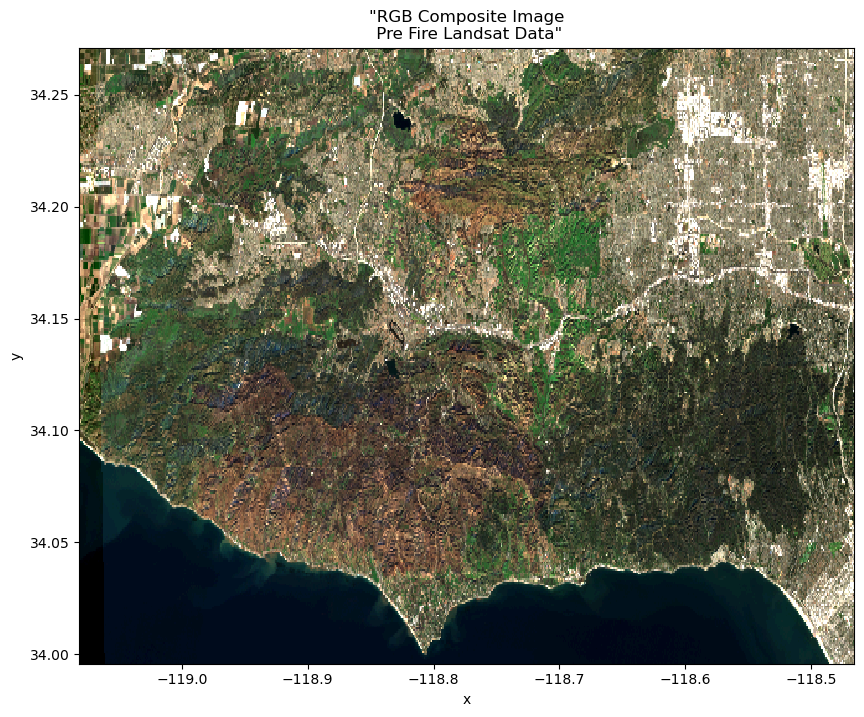

In [ ]:
# 3. Map the RGB composites for both dates.

# plot and make rgb composite
# [3,2,1] = [red,green,blue]
# red is fourth band, but index 3 because python starts at 0
# use robust = true to fix brightness
predata_rgb = (predata_xr[[3,2,1],:,:])
predata_rgb.plot.imshow(rgb="band",robust = True, figsize=(10, 8))
plt.title('"RGB Composite Image\n Pre Fire Landsat Data"')
plt.show()

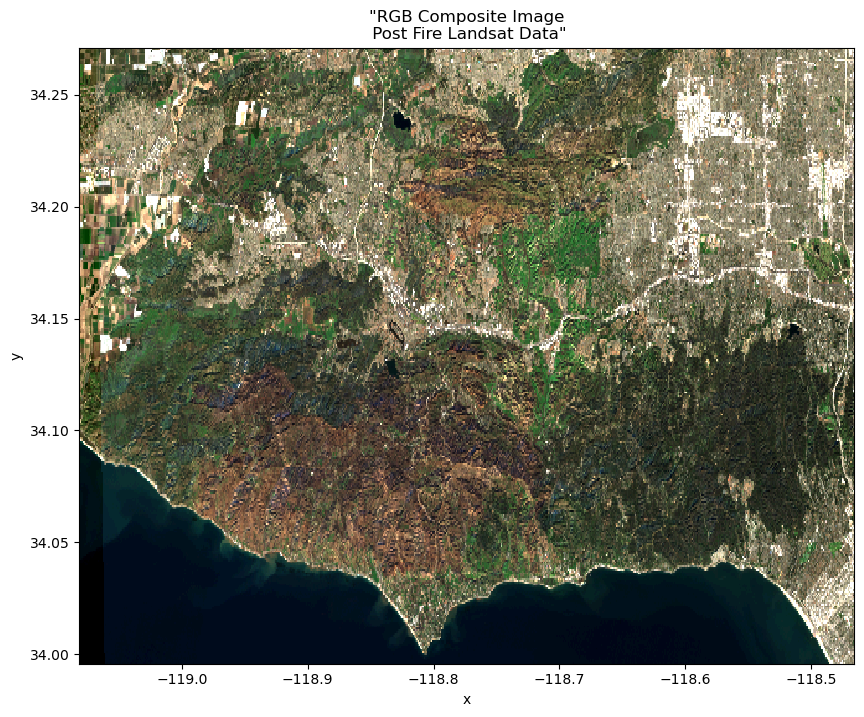

In [ ]:
postdata_rgb = (postdata_xr[[3,2,1],:,:])
postdata_rgb.plot.imshow(rgb="band",robust = True, figsize=(10, 8))
plt.title('"RGB Composite Image\n Post Fire Landsat Data"')
plt.show()

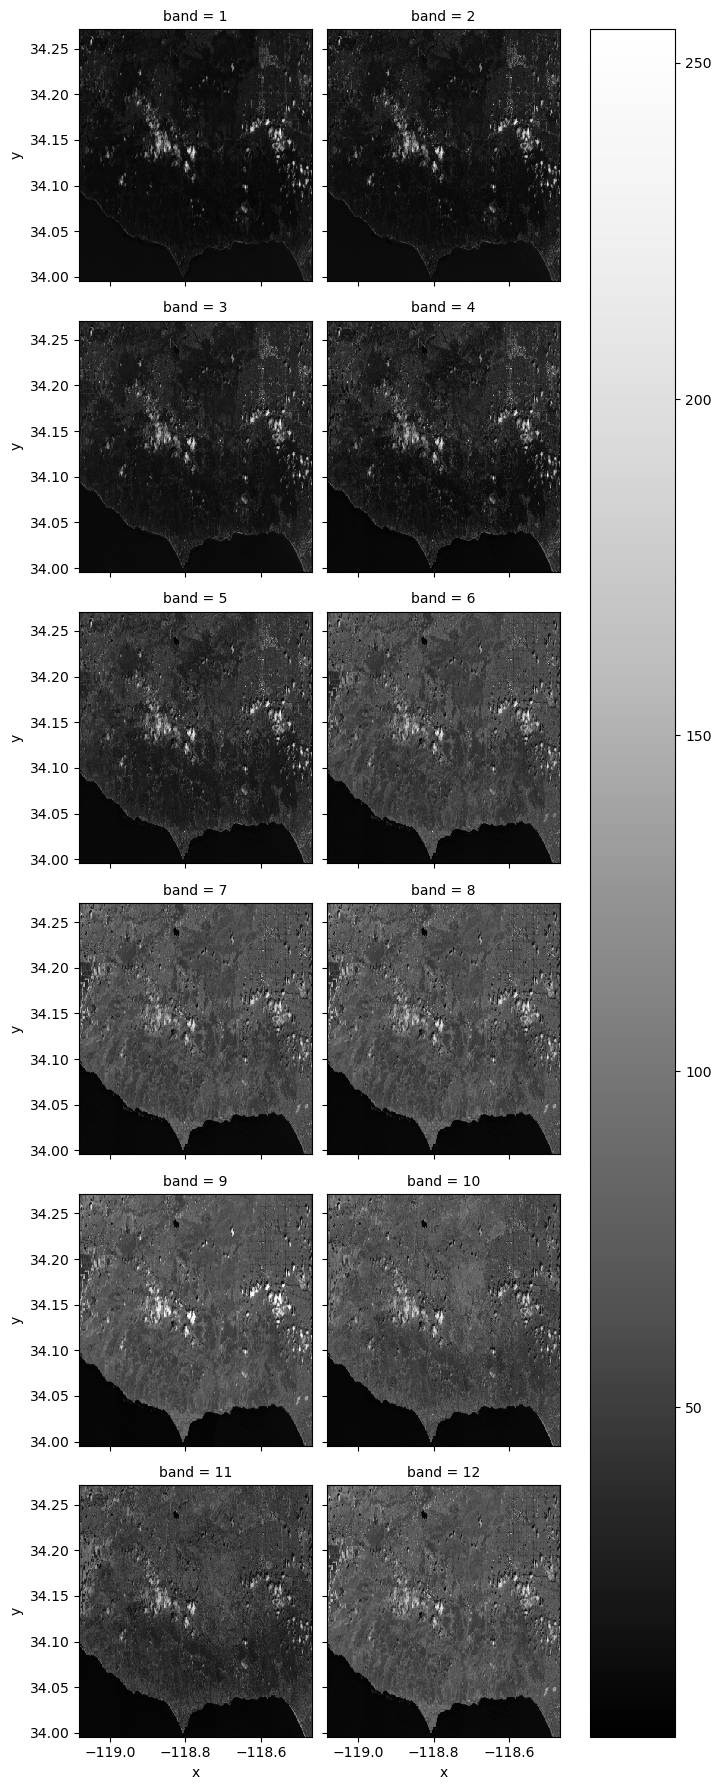

In [10]:
# Plot the final stacked data
predata_stack.plot.imshow(col="band",
                            col_wrap=2,
                            cmap="Greys_r")
plt.show()

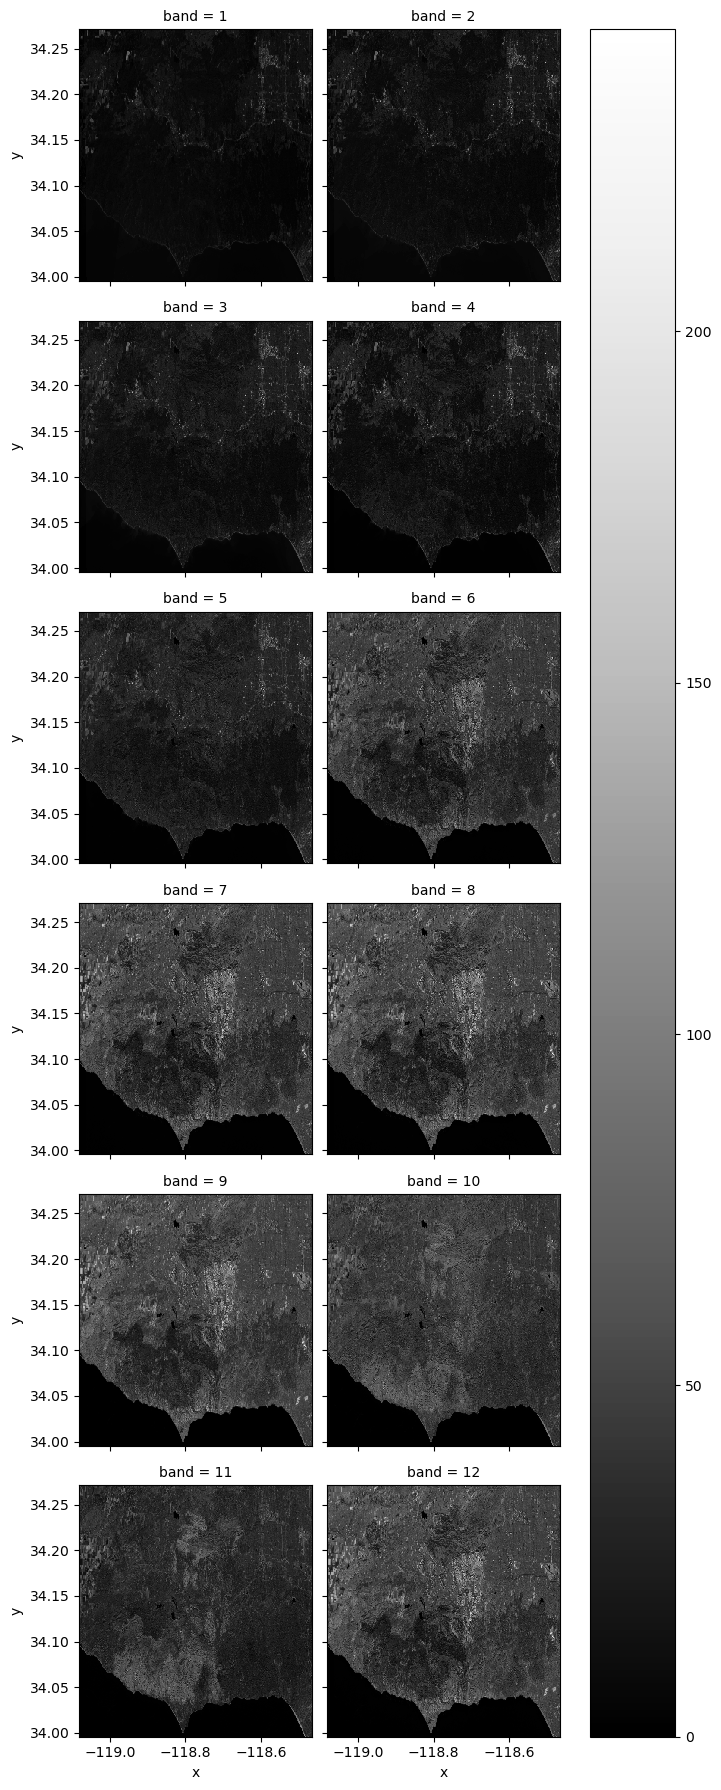

In [ ]:
# Plot the final stacked data
postdata_stack.plot.imshow(col="band",
                            col_wrap=2,
                            cmap="Greys_r")
plt.show()

In [15]:
print("Pre fire CRS is", predata_stack.rio.crs)
print("Post fire CRS is", postdata_stack.rio.crs)

Pre fire CRS is EPSG:4326
Post fire CRS is EPSG:4326


In [ ]:
# 4. Calculate the NDVI and map both dates.
# Automated final work flow

In [20]:
# Calculate NDVI
preband_NDVI = (preband_infared - preband_red) / (preband_infared + preband_red)

postband_NDVI = (postband_infared - postband_red) / (postband_infared + postband_red)

ValueError: 'RdY1Gn' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

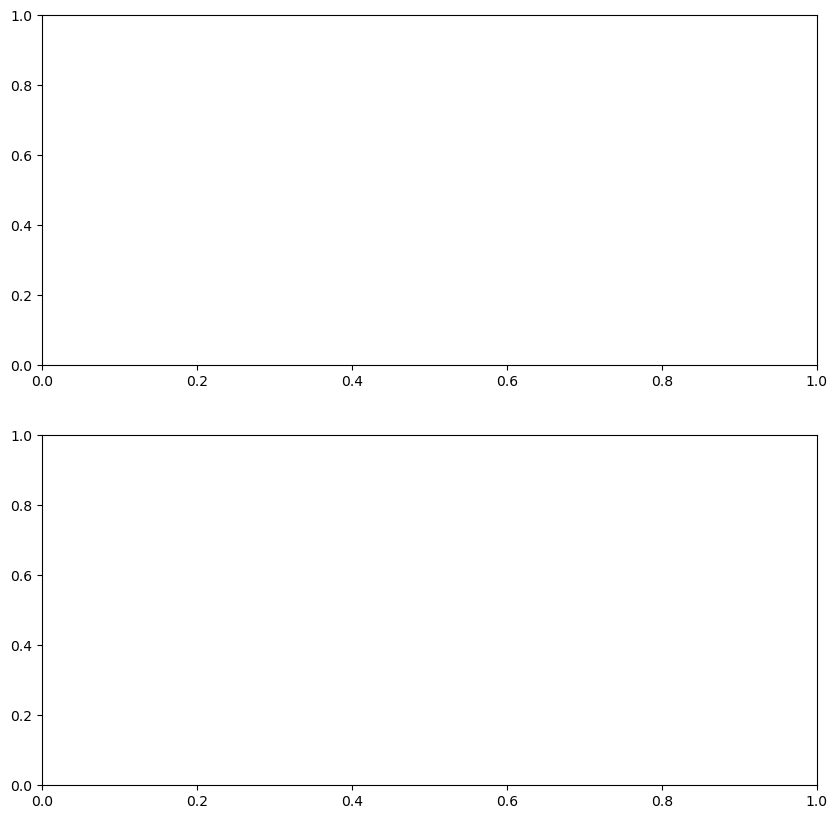

In [24]:
fig,(ax1,ax2)= plt.subplots(2,1,figsize =(10,10))
preband_NDVI.plot.imshow(cmap="RdY1Gn", ax=ax1)
ax1.set_title(' "NDVI Image\n Pre Fire Plot" ')

postband_NDVI.plot.imshow(cmap="RdY1Gn", ax=ax2)
ax1.set_title(' "NDVI Image\n Post Fire Plot" ')

ax1.set_axis_off()
ax2.set_axis_off()

plt.axis('equal')
plt.show()

# 5. Write a few sentences of what differences you see between the RGB/NDVI maps.

I couldnt get the NDVI map to work but I will still write about their differences. A RGB map is a red green blue map which shows an image of an area using those three color bands. A NDVI map is more of a graphical indicator than a photo. It uses remote sensing to measure the amount of vegetation in an area. So RGB maps will come out looking more like a photo and NDVI will appear more as a plot. 